In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#Load data
#define header
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC','NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','PM2.5','AH']

#define number of columns from csv
use=list(np.arange(len(col)))

#read the data from csv
df=pd.read_csv("AirQuality.csv")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,PM2.5,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [ ]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T                float64
PM2.5            float64
AH               float64
dtype: object

In [ ]:
df.shape

(9357, 15)

In [ ]:
#drop end rows with NaN values
df.dropna(how='all',inplace=True)
#drop NAN rows
df.dropna(thresh=10,axis=0,inplace=True)

In [ ]:
df.shape

(9357, 15)

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].apply(lambda x: x.hour)

# convert "Date" column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# create new columns for day, month, and year
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,PM2.5,AH,Hour,Day,Month,Year
0,2004-03-10,2023-04-25 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,18,10,3,2004
1,2004-03-10,2023-04-25 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,19,10,3,2004
2,2004-03-10,2023-04-25 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,20,10,3,2004
3,2004-03-10,2023-04-25 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,21,10,3,2004
4,2004-03-10,2023-04-25 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,22,10,3,2004


In [ ]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
PM2.5            0
AH               0
Hour             0
Day              0
Month            0
Year             0
dtype: int64


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%m-%d-%Y')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,PM2.5,AH,Hour,Day,Month,Year
0,03-10-2004,2023-04-25 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,18,10,3,2004
1,03-10-2004,2023-04-25 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,19,10,3,2004
2,03-10-2004,2023-04-25 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,20,10,3,2004
3,03-10-2004,2023-04-25 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,21,10,3,2004
4,03-10-2004,2023-04-25 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,22,10,3,2004


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   object        
 1   Time           9357 non-null   datetime64[ns]
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   int64         
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   int64         
 7   NOx(GT)        9357 non-null   int64         
 8   PT08.S3(NOx)   9357 non-null   int64         
 9   NO2(GT)        9357 non-null   int64         
 10  PT08.S4(NO2)   9357 non-null   int64         
 11  PT08.S5(O3)    9357 non-null   int64         
 12  T              9357 non-null   float64       
 13  PM2.5          9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  Hour           9357 n

<Axes: >

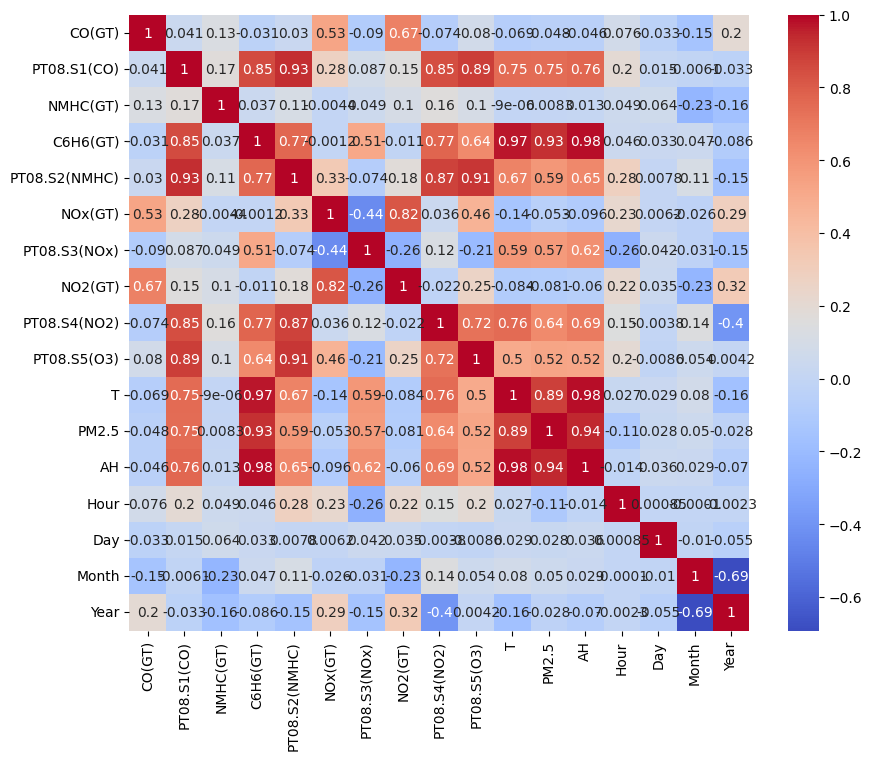

In [ ]:
df = df.drop(['Time', 'Date'], axis=1)

# calculate correlation matrix
corr_matrix = df.corr()
# plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

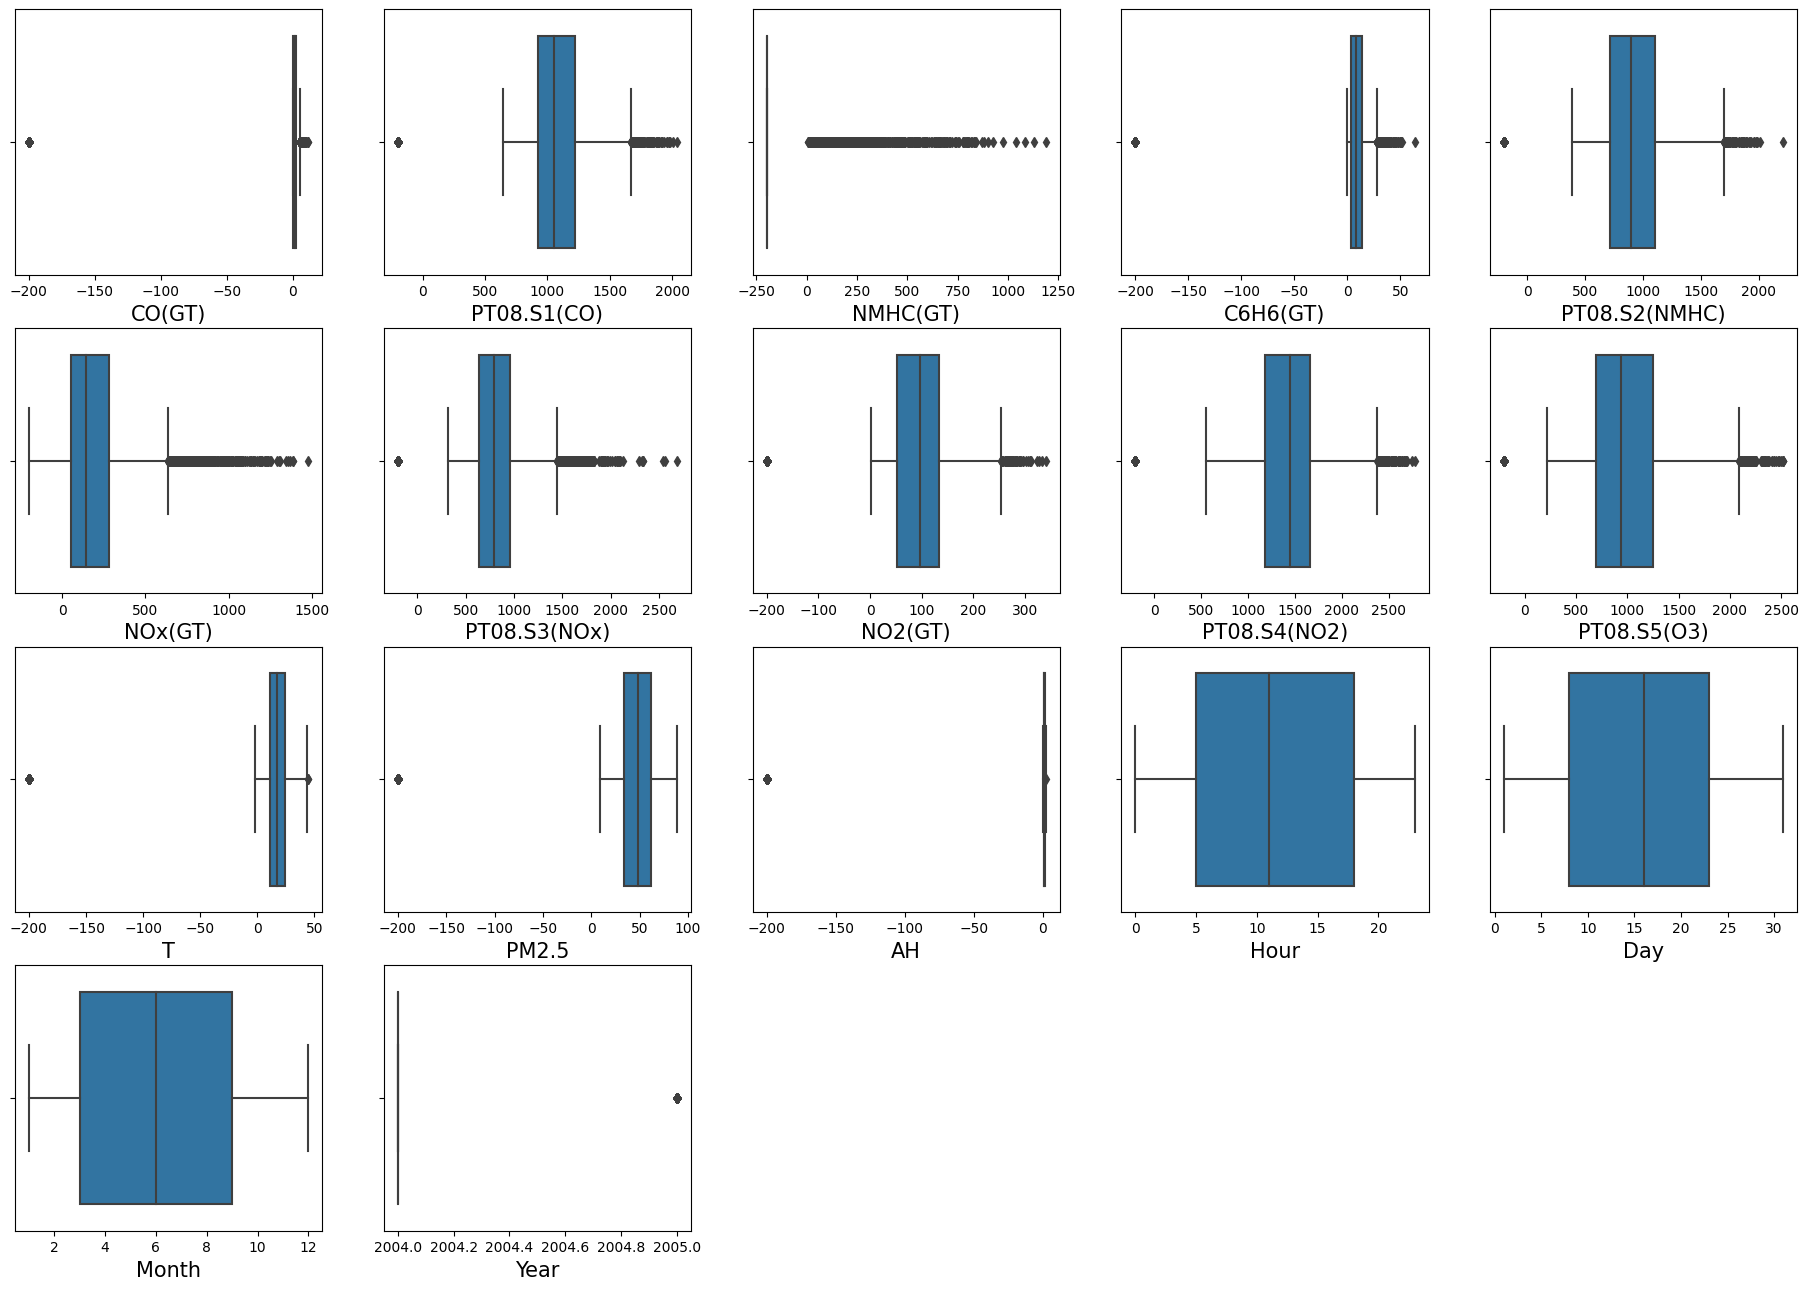

In [ ]:
plt.figure(figsize=(23,20))
for i,col in enumerate(df):
    plt.subplot(5,5,i+1)
    sns.boxplot(data = df,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

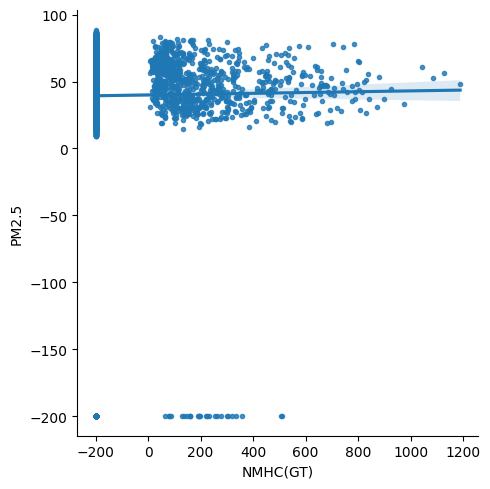

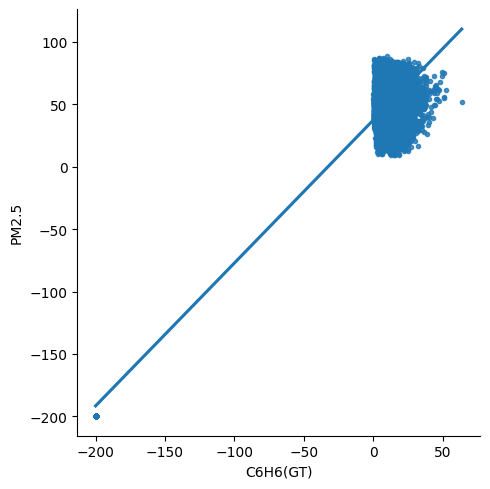

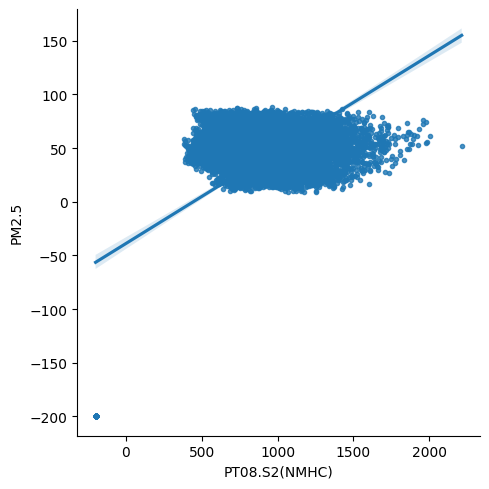

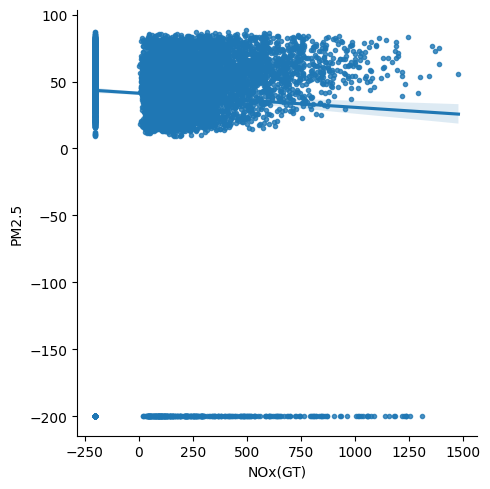

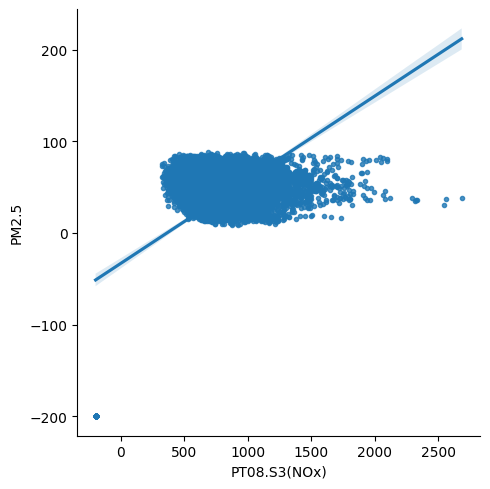

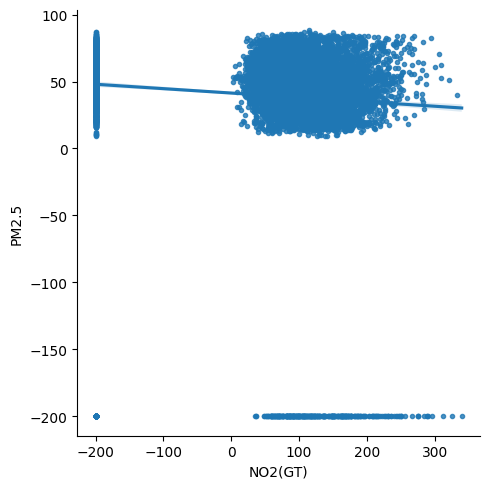

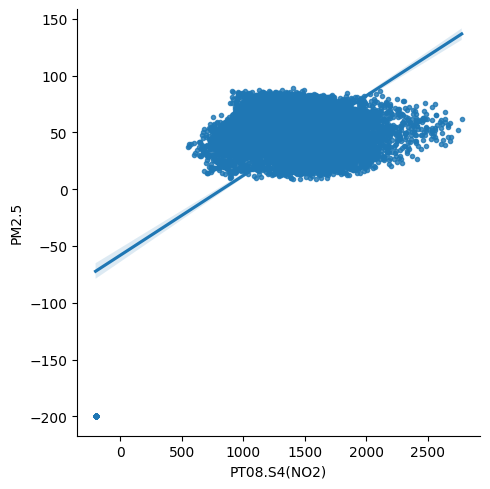

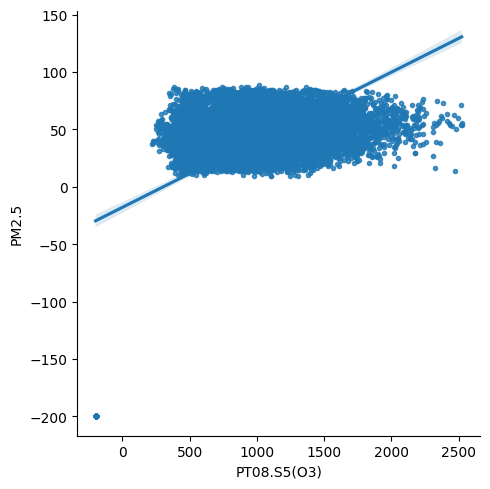

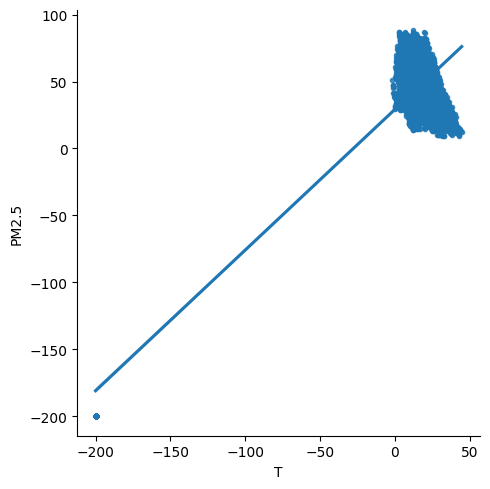

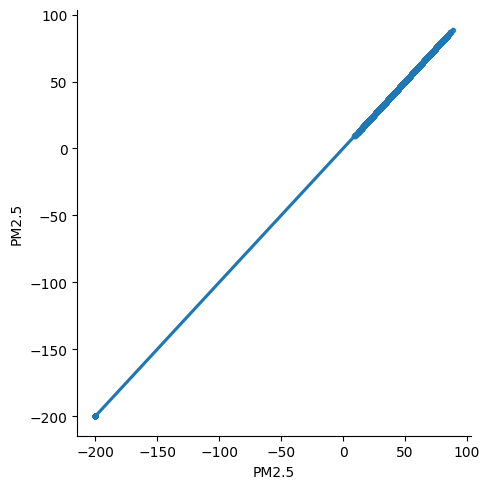

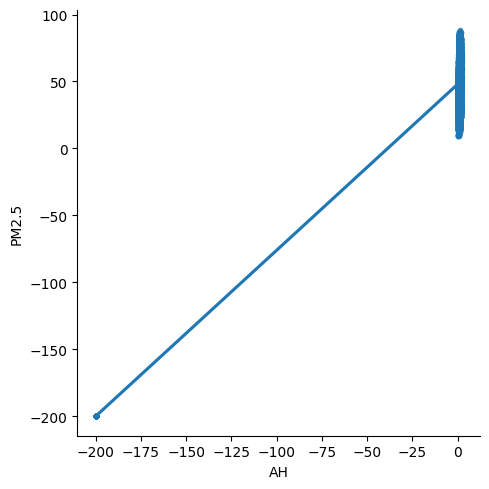

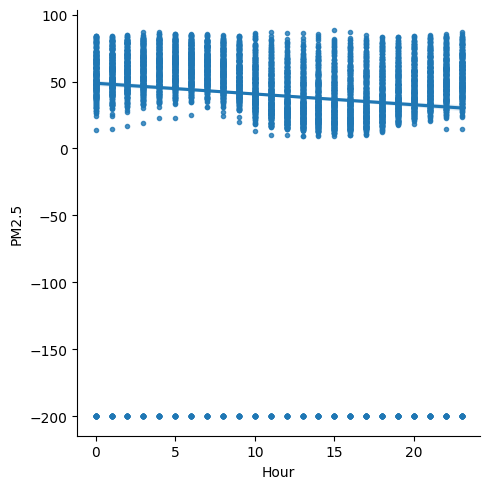

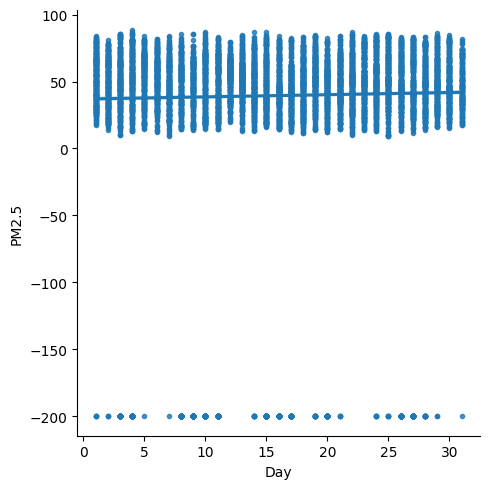

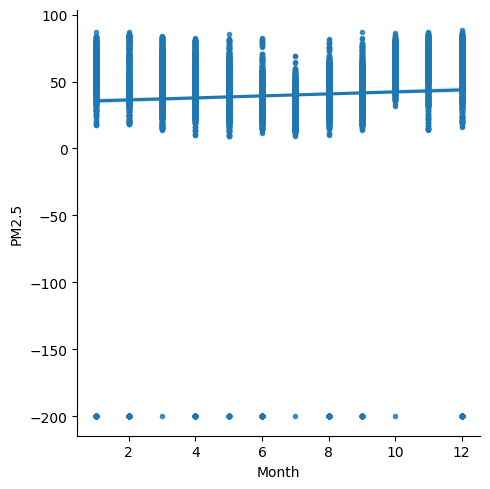

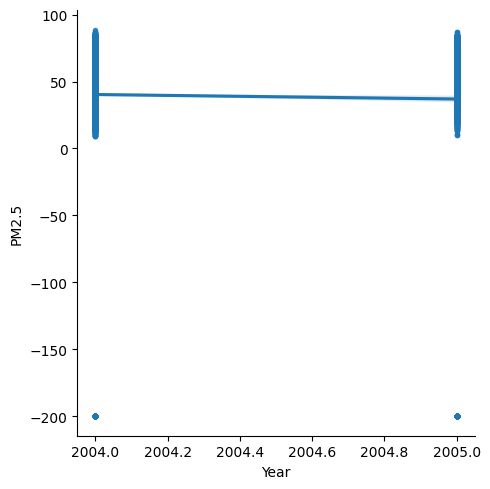

In [ ]:
#plot all X-features against output variable PM2.5
col_=df.columns.tolist()[2:]
for i in col_:
    sns.lmplot(x=i,y='PM2.5',data=df,markers='.')

# Modelling

In [ ]:
# select the X features and y target variable
X = df.drop(columns=['PM2.5'])
y = df['PM2.5']

# split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#**Random Forest Regression**

In [ ]:
# Initialize the random forest regressor with 100 trees
rf_regressor = RandomForestRegressor(n_estimators=100)

# Fit the regressor to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_regressor.predict(X_test)

# Evaluate the performance of the model using different metrics
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 0.2796331079059828
Root Mean Squared Error: 0.528803468129685
Mean Absolute Error: 0.3534732905982905
R-squared: 0.9998913536087152


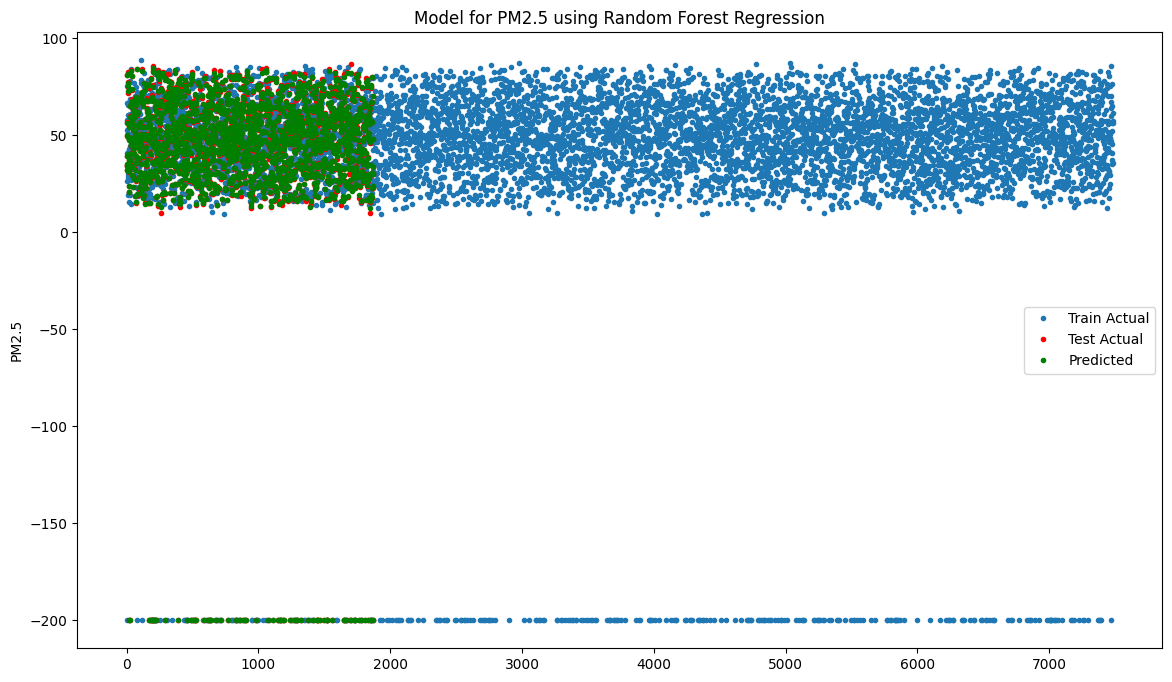

In [ ]:
# Plot actual and predicted values for Random Forest
plt.figure(figsize=(14,8))
plt.title("Model for PM2.5 using Random Forest Regression")
plt.ylabel("PM2.5")
plt.plot(y_train.values,'.', label='Train Actual')
plt.plot(y_test.values, 'r.',label='Test Actual')
plt.plot(y_pred,'g.', label='Predicted')
plt.legend()
plt.show()

#**Decision Tree Regression**

In [ ]:
# Initialize the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor to the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_regressor.predict(X_test)

# Evaluate the performance of the model using different metrics
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 1.470544871794872
Root Mean Squared Error: 1.2126602458210922
Mean Absolute Error: 0.8841880341880343
R-squared: 0.9994286463618728


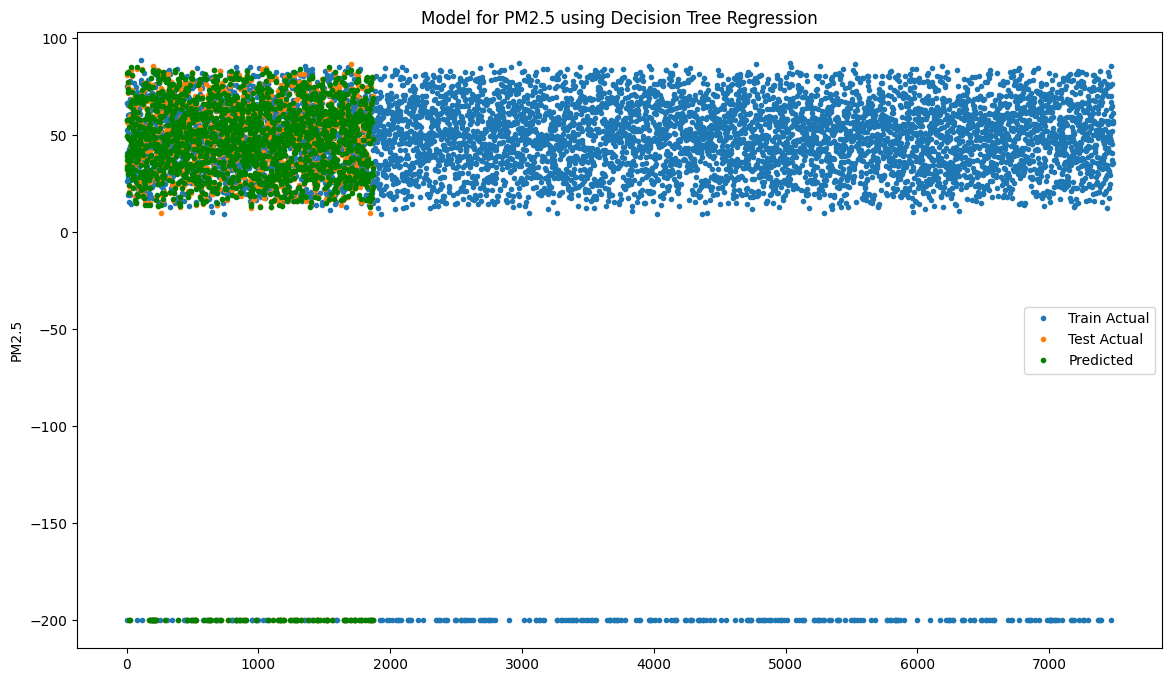

In [ ]:
# Plot actual and predicted values for Decision Tree
plt.figure(figsize=(14,8))
plt.plot(y_train.values, '.', label='Train Actual')
plt.plot(y_test.values,'.', label='Test Actual')
plt.plot(y_pred,'g.', label='Predicted')
plt.legend()
plt.title('Model for PM2.5 using Decision Tree Regression')
plt.ylabel("PM2.5")
plt.show()

#**Elastic Net Regression**

In [ ]:
# Fit the Elastic Net regression model
model = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
model.fit(X_train, y_train)

# Evaluate the model on test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model using different metrics
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 44.08582756277315
Root Mean Squared Error: 6.639715924855005
Mean Absolute Error: 5.248659509540995
R-squared: 0.9828712483032928


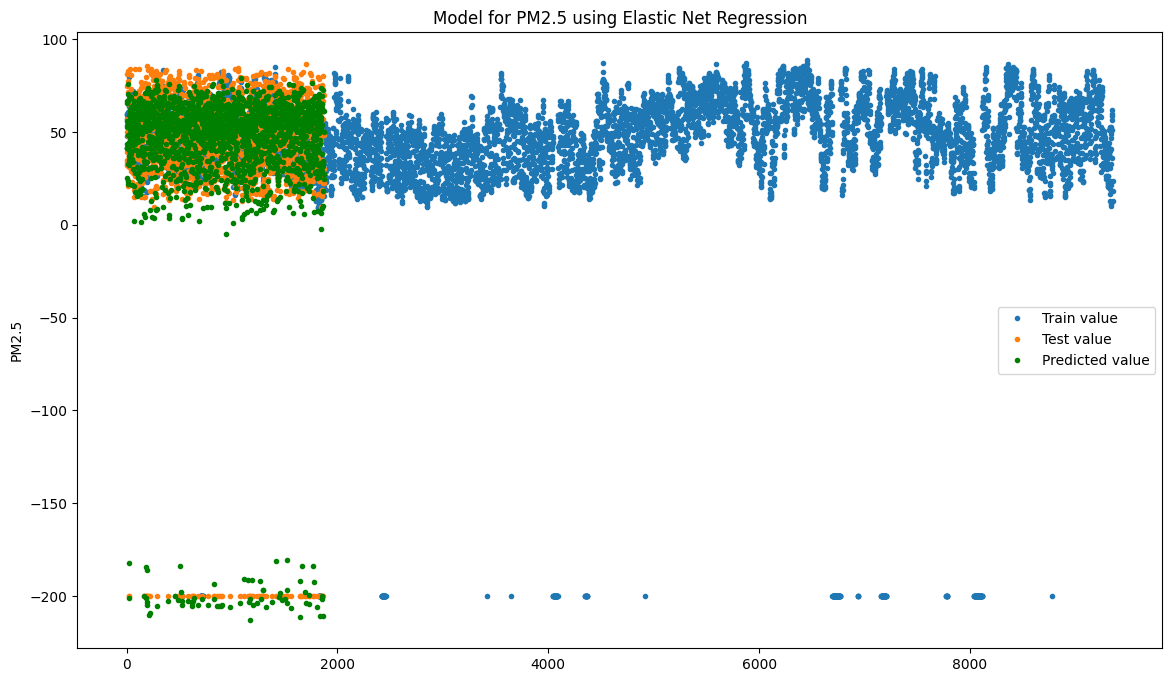

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(y_train, '.', label='Train value')
plt.plot(y_test.values, '.', label='Test value')
plt.plot(y_pred, 'g.', label='Predicted value')
plt.legend()
plt.title('Model for PM2.5 using Elastic Net Regression')

plt.ylabel('PM2.5')
plt.show()

#**Lasso Regression**

In [ ]:
# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Evaluate the model on test set
y_pred = lasso.predict(X_test)

# Evaluate the performance of the model using different metrics
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 43.81540812175993
Root Mean Squared Error: 6.619320820277555
Mean Absolute Error: 5.2281571830910565
R-squared: 0.9829763148907915


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.872e+05, tolerance: 1.972e+03
  model = cd_fast.enet_coordinate_descent(


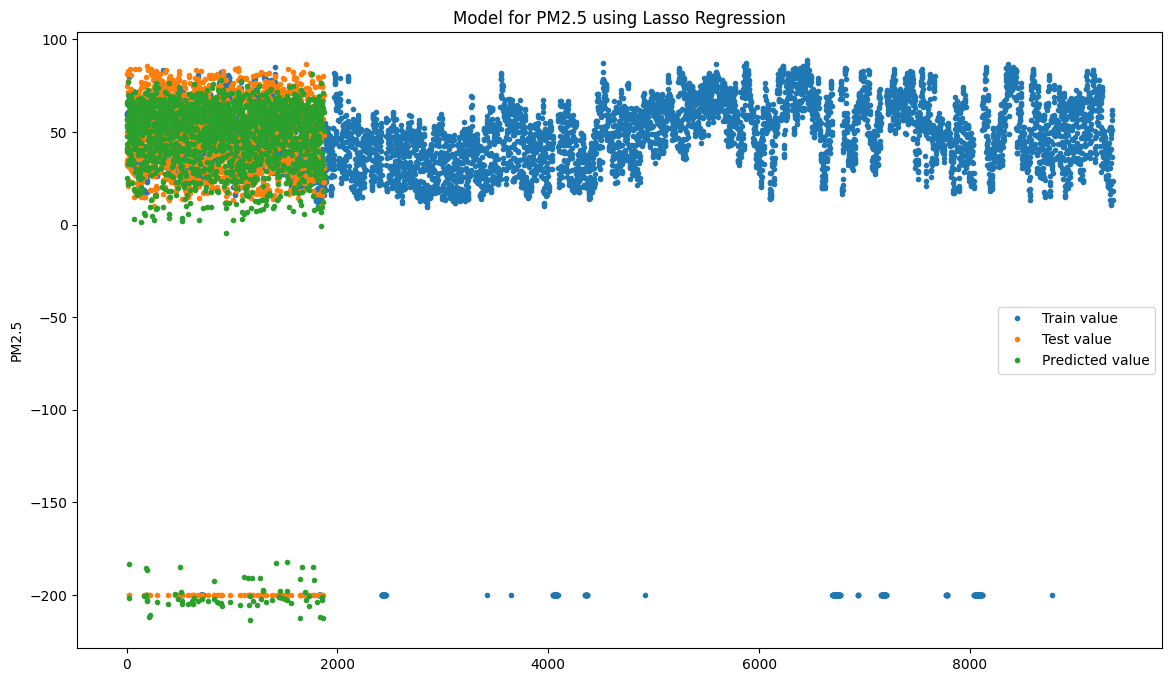

In [ ]:
# Plot results
plt.figure(figsize=(14,8))
plt.plot(y_train, '.', label='Train value')
plt.plot(y_test.values, '.', label='Test value')
plt.plot(y_pred, '.', label='Predicted value')
plt.legend()
plt.title('Model for PM2.5 using Lasso Regression')
plt.ylabel('PM2.5')
plt.show()

#**SVR**

In [ ]:
# Create and train the SVR model
regressor = SVR()
regressor.fit(X_train, y_train)

# Predict the values
y_pred = regressor.predict(X_test)

# Evaluate the performance of the model using different metrics
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 224.83969576390103
Root Mean Squared Error: 14.994655573366833
Mean Absolute Error: 12.252046174243114
R-squared: 0.9126425989209488


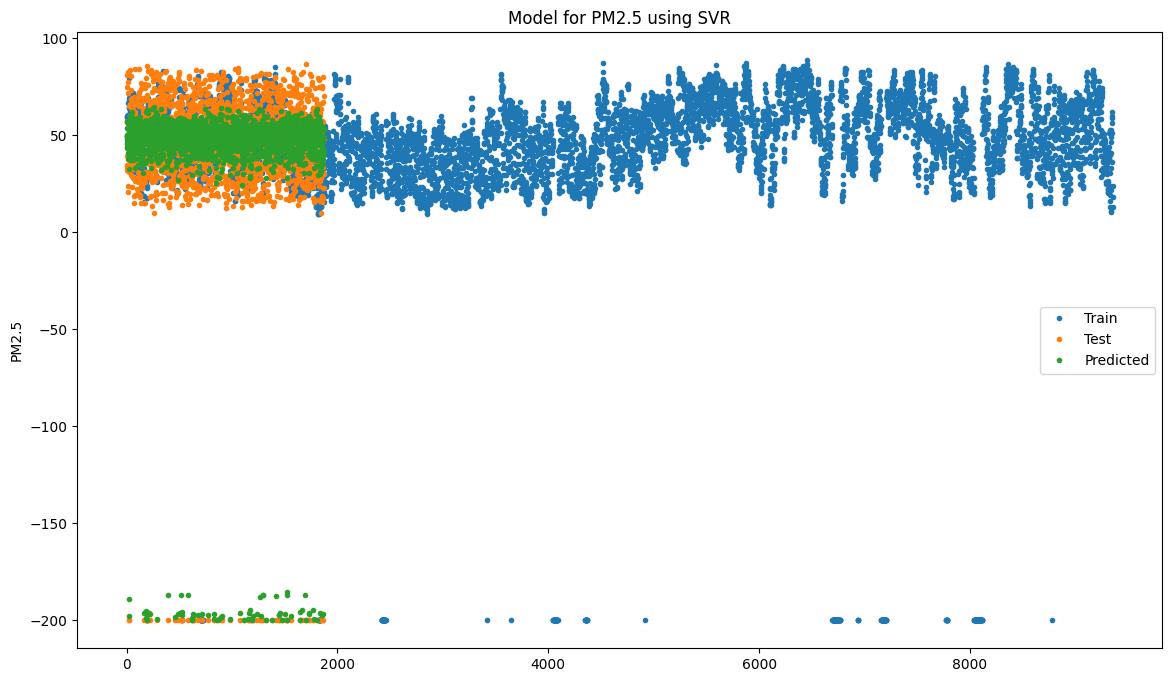

In [ ]:
#Plot the data
plt.figure(figsize=(14,8))
plt.plot(y_train, '.', label='Train')
plt.plot(y_test.values, '.', label='Test')
plt.plot(y_pred, '.', label='Predicted')
plt.legend()
plt.title('Model for PM2.5 using SVR')
plt.ylabel('PM2.5')
plt.show()

#**Ridge Regression**

In [ ]:
# Fit Ridge regression model
alpha = 1
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)

# Make predictions on train and test sets
y_pred = model.predict(X_test)

# Evaluate the performance of the model using different metrics
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 39.510039709482655
Root Mean Squared Error: 6.285701210643301
Mean Absolute Error: 5.015665627055541
R-squared: 0.9846490879921184


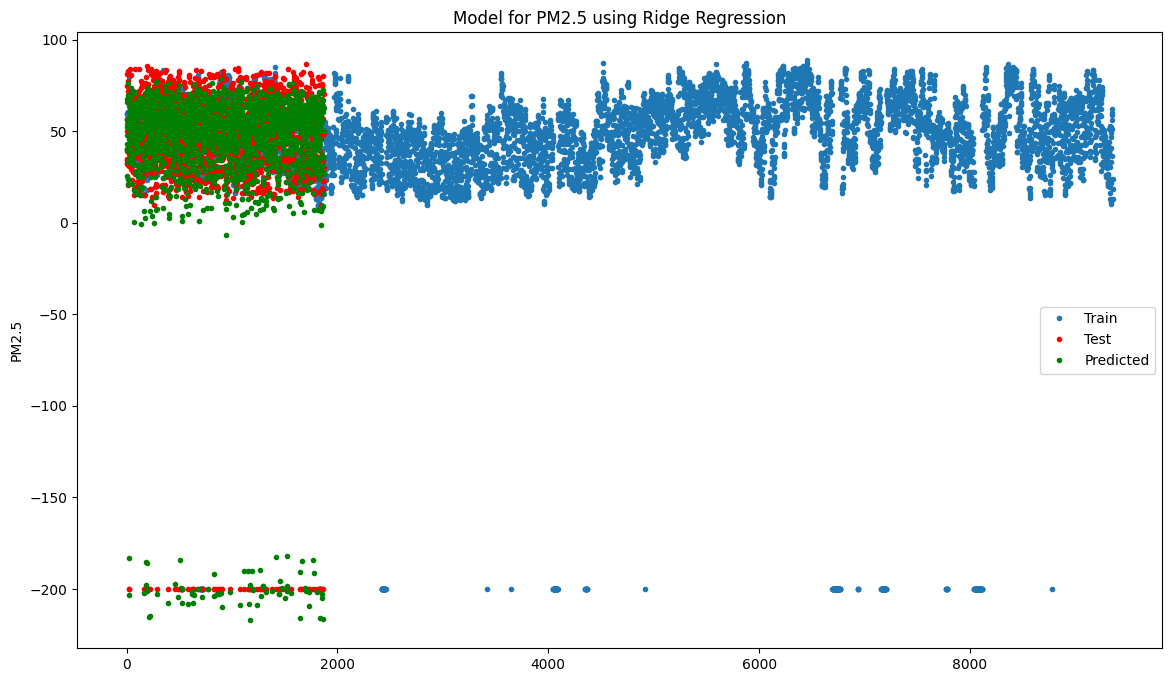

In [ ]:
# Plot train and test sets and predicted values
plt.figure(figsize=(14,8))
plt.plot( y_train, '.', label='Train')
plt.plot( y_test.values, 'r.', label='Test')
plt.plot( y_pred, 'g.', label='Predicted')
plt.ylabel('PM2.5')
plt.title('Model for PM2.5 using Ridge Regression')
plt.legend()
plt.show()

# Neural Network

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the data
data = pd.read_csv('AirQuality.csv')
#Convert the 'Date' column to pandas datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the month from the 'Date' column
data['Month'] = data['Date'].dt.month

# Calculate the monthly average of 'PM2.5' column
monthly_data = data.groupby('Month')['PM2.5'].mean().reset_index()

# Split the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(monthly_data['Month'], monthly_data['PM2.5'], test_size=0.2, random_state=42)


# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size,:]
test_data = data.iloc[train_size:,:]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data[['PM2.5']])
test_data_scaled = scaler.transform(test_data[['PM2.5']])

# Convert the data into sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    X = np.array(X)
    y = np.array(y)
    return X, y

seq_length = 3
X_train, y_train = create_sequences(train_data_scaled, seq_length)
X_test, y_test = create_sequences(test_data_scaled, seq_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

Epoch 1/100
234/234 [==============================] - 6s 7ms/step - loss: 0.0485
Epoch 2/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0052
Epoch 3/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0049
Epoch 4/100
234/234 [==============================] - 2s 8ms/step - loss: 0.0048
Epoch 5/100
234/234 [==============================] - 3s 11ms/step - loss: 0.0047
Epoch 6/100
234/234 [==============================] - 2s 11ms/step - loss: 0.0047
Epoch 7/100
234/234 [==============================] - 2s 8ms/step - loss: 0.0044
Epoch 8/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0041
Epoch 9/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0038
Epoch 10/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0035
Epoch 11/100
234/234 [==============================] - 2s 8ms/step - loss: 0.0032
Epoch 12/100
234/234 [==============================] - 2s 10ms/step - loss: 0.0030
Epoch 13/1

In [ ]:
# Evaluate the performance of the model using different metrics
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 195.00808355505342
Root Mean Squared Error: 13.96452947846985
Mean Absolute Error: 3.9249080354482366
R-squared: 0.9352188097383329


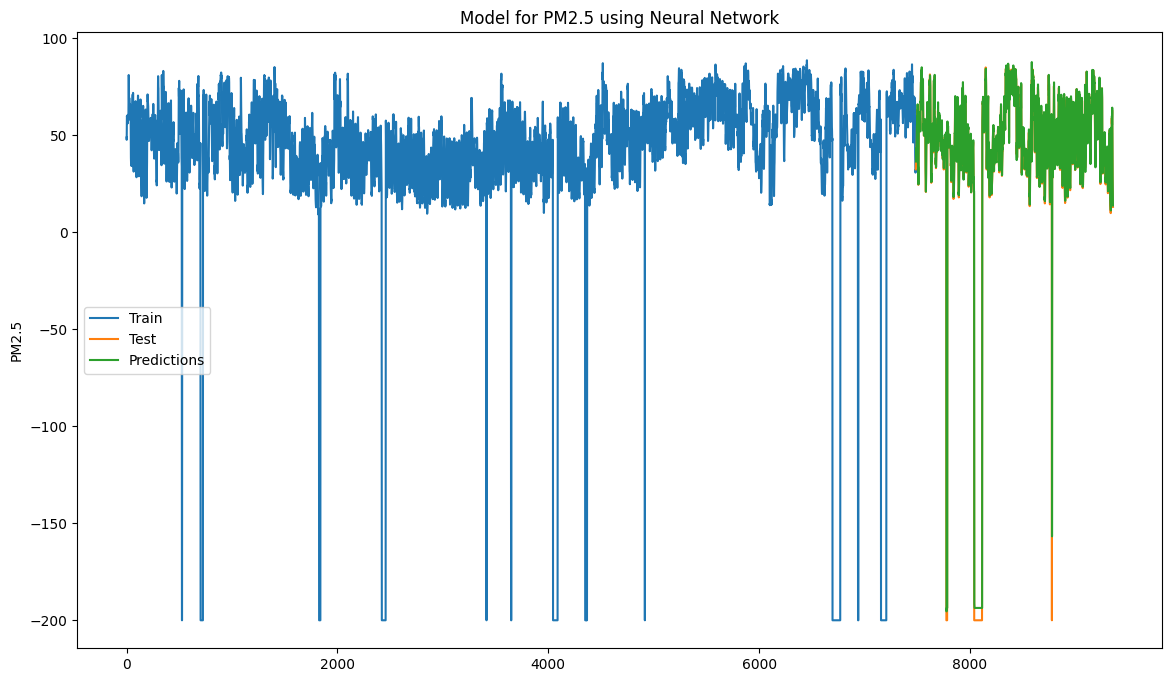

In [ ]:
# Plot the results
plt.figure(figsize=(14,8))
plt.plot(train_data['PM2.5'])
plt.plot(range(train_size, len(data)), test_data['PM2.5'])
plt.plot(range(train_size+seq_length, len(data)), y_pred)
plt.ylabel('PM2.5')
plt.legend(['Train', 'Test', 'Predictions'])
plt.title('Model for PM2.5 using Neural Network')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
# Load the data
data = pd.read_csv('AirQuality.csv')

# Drop 'Date' and 'Time' columns
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size,:]
test_data = data.iloc[train_size:,:]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Convert the data into sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :])
        y.append(data[i, -1])  # Use the PM2.5 column as the target variable
    X = np.array(X)
    y = np.array(y)
    return X, y

seq_length = 3
X_train, y_train = create_sequences(train_data_scaled, seq_length)
X_test, y_test = create_sequences(test_data_scaled, seq_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)
#y_pred = scaler.inverse_transform(y_pred)
#y_test = scaler.inverse_transform(y_test)



Epoch 1/100
234/234 [==============================] - 7s 11ms/step - loss: 0.0513
Epoch 2/100
234/234 [==============================] - 2s 9ms/step - loss: 0.0056
Epoch 3/100
234/234 [==============================] - 2s 10ms/step - loss: 0.0054
Epoch 4/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0052
Epoch 5/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0049
Epoch 6/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0046
Epoch 7/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0044
Epoch 8/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0040
Epoch 9/100
234/234 [==============================] - 2s 8ms/step - loss: 0.0038
Epoch 10/100
234/234 [==============================] - 2s 10ms/step - loss: 0.0036
Epoch 11/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0036
Epoch 12/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0035
Epoch 13/1

Mean Squared Error: 0.002934889890779585
Root Mean Squared Error: 0.054174624048345596
Mean Absolute Error: 0.01011494821347099
R-squared: 0.9320689330818157


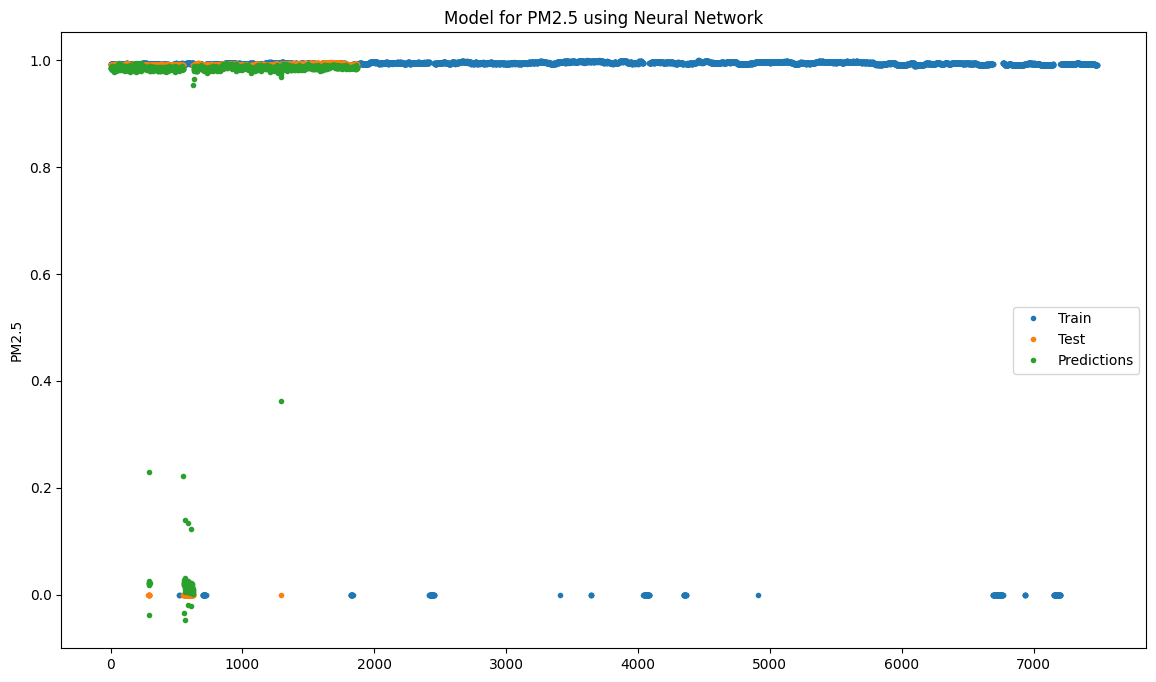

In [ ]:
# Evaluate the performance of the model using different metrics
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)


# Plot the results
plt.figure(figsize=(14,8))
plt.plot(y_train,'.')
plt.plot(y_test,'.')
plt.plot(y_pred,'.')
plt.ylabel('PM2.5')
plt.legend(['Train', 'Test', 'Predictions'])
plt.title('Model for PM2.5 using Neural Network')
plt.show()

#Comparison Study

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
# Plot the scores
from tabulate import tabulate
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neural_network import MLPRegressor


# Load the data
data = pd.read_csv('/content/AirQuality.csv')

# Extract the features and target variable
X = data.drop(columns=['PM2.5','Date','Time'])
y = data['PM2.5']

# split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regression models
svc = SVR()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
lasso = Lasso()
ridge = Ridge()
elastic = ElasticNet()
nn = MLPRegressor()

# Train the regression models
svc.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic.fit(X_train, y_train)
nn.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_svc = svc.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_elastic = elastic.predict(X_test)
y_pred_nn = nn.predict(X_test)

# Compute the R-squared score for each model
r2_svc = r2_score(y_test, y_pred_svc)
r2_rf = r2_score(y_test, y_pred_rf)
r2_dt = r2_score(y_test, y_pred_dt)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_elastic = r2_score(y_test, y_pred_elastic)
r2_nn = r2_score(y_test, y_pred_nn)

# Plot the scores
models = ['SVR', 'Random Forest', 'Decision Tree', 'Lasso', 'Ridge', 'Elastic Net', 'Neural Network']
scores = [r2_svc, r2_rf, r2_dt, r2_lasso, r2_ridge, r2_elastic, r2_nn]
table = list(zip(models, scores))
headers = ["Model", "R2 Score"]

print(tabulate(table, headers=headers))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.965e+05, tolerance: 1.972e+03
  model = cd_fast.enet_coordinate_descent(


Model             R2 Score
--------------  ----------
SVR               0.926033
Random Forest     0.999902
Decision Tree     0.999456
Lasso             0.976799
Ridge             0.977825
Elastic Net       0.976227
Neural Network    0.986002


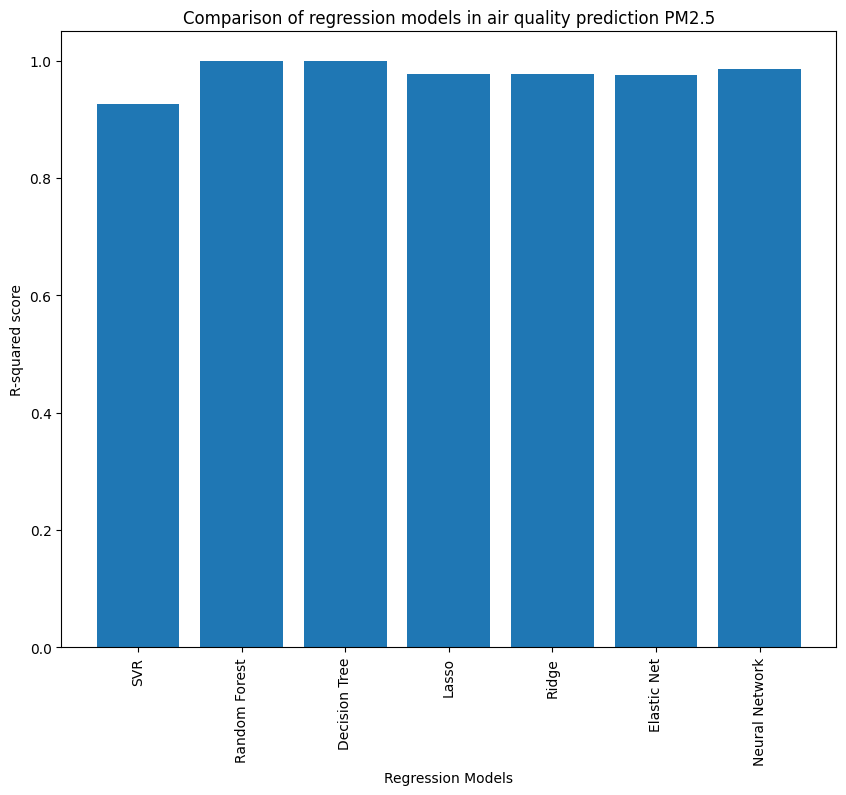

In [ ]:
plt.xticks(rotation=90);
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('R-squared score')
plt.title('Comparison of regression models in air quality prediction PM2.5')
plt.show()